In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.ensemble as ske
import sklearn.linear_model as skl
import sklearn.model_selection as skm
#!pip install pycaret
#!pip install -U Jinja2




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.1 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's depend

#Dicionario de Variaveis

AtBat -> Numero de vezes que um rebatedor acertou a bola no bastão

Hits -> Numero de rebatidas dentro da area permitida

HmRun -> Numero de Home Runs acertados por rebatedor

RBI -> Numero de corridas efetivas graças a rebatida

Walks -> Numero de caminhadas do rebatedor

Years -> Numero de anos na liga major

CAtBat -> Numero de vezes que jogou como rebatedor

CHits -> Numero de Hits durante a carreira

CHmRun -> Numero de Home runs feitos durante a carreira

CRuns -> Numero de corridas durante a carreira

CRBI -> Numero de RBI durante a carreira

CWalks -> Numero de walks durante a carreira

League -> Fator dado pela liga onde o jogador joga podendo ser a
Americana ou a Nacional

Division -> Fator dado pela região da liga aonde o jogador joga sendo West e East pois na epoca não existia a liga South

PutOuts -> Numero de vezes que o jogador como defensor eliminou um rebatedor

Assists -> Numero de vezes que um jogador da defesa ajudou a eliminar um rebatedor

Errors -> Numero de vezes que um jogador cometeu um erro na defesa

Salary -> Salario do jogador

NewLeague -> Variavel sobre a liga do jogador no ínicio do ano de 1987

Runs -> Numero de corridas feitas pelo jogador

#Lendo Os Dados

In [ ]:
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url, index_col = 0)

#Limpeza dos dados

In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


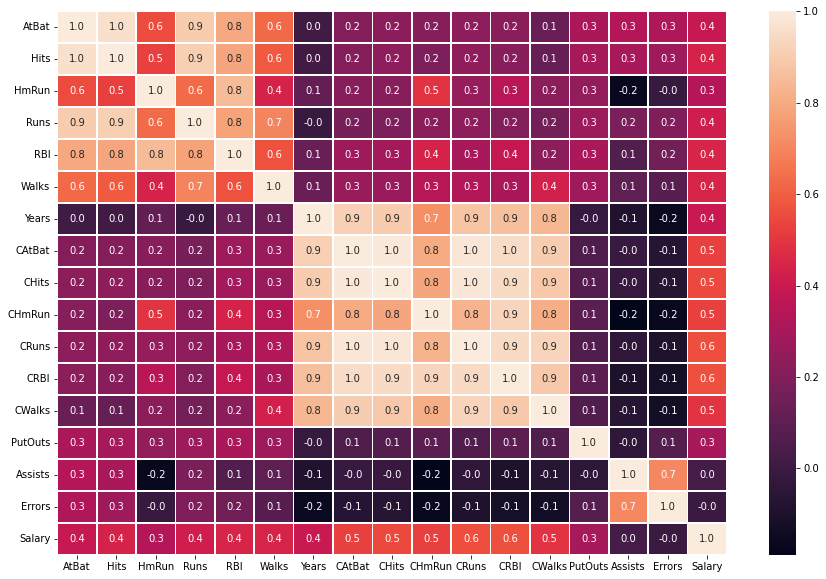

In [ ]:
correlation = (df.corr())
plt.figure(figsize=(15,10))
plot_cor = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot_cor


In [ ]:
df.groupby(["NewLeague"])["RBI"].describe()

,count,mean,std,min,25%,50%,75%,max
NewLeague,,,,,,,,
A,141.0,54.93617,27.532893,3.0,33.0,50.0,74.0,121.0
N,122.0,47.50000,23.314682,0.0,29.0,43.0,61.0,116.0


In [ ]:
df = df.drop(columns=['Salary', 'Errors', 'League','PutOuts','PutOuts', 'Division','Assists','AtBat','Runs'])

<Figure size 864x432 with 0 Axes>

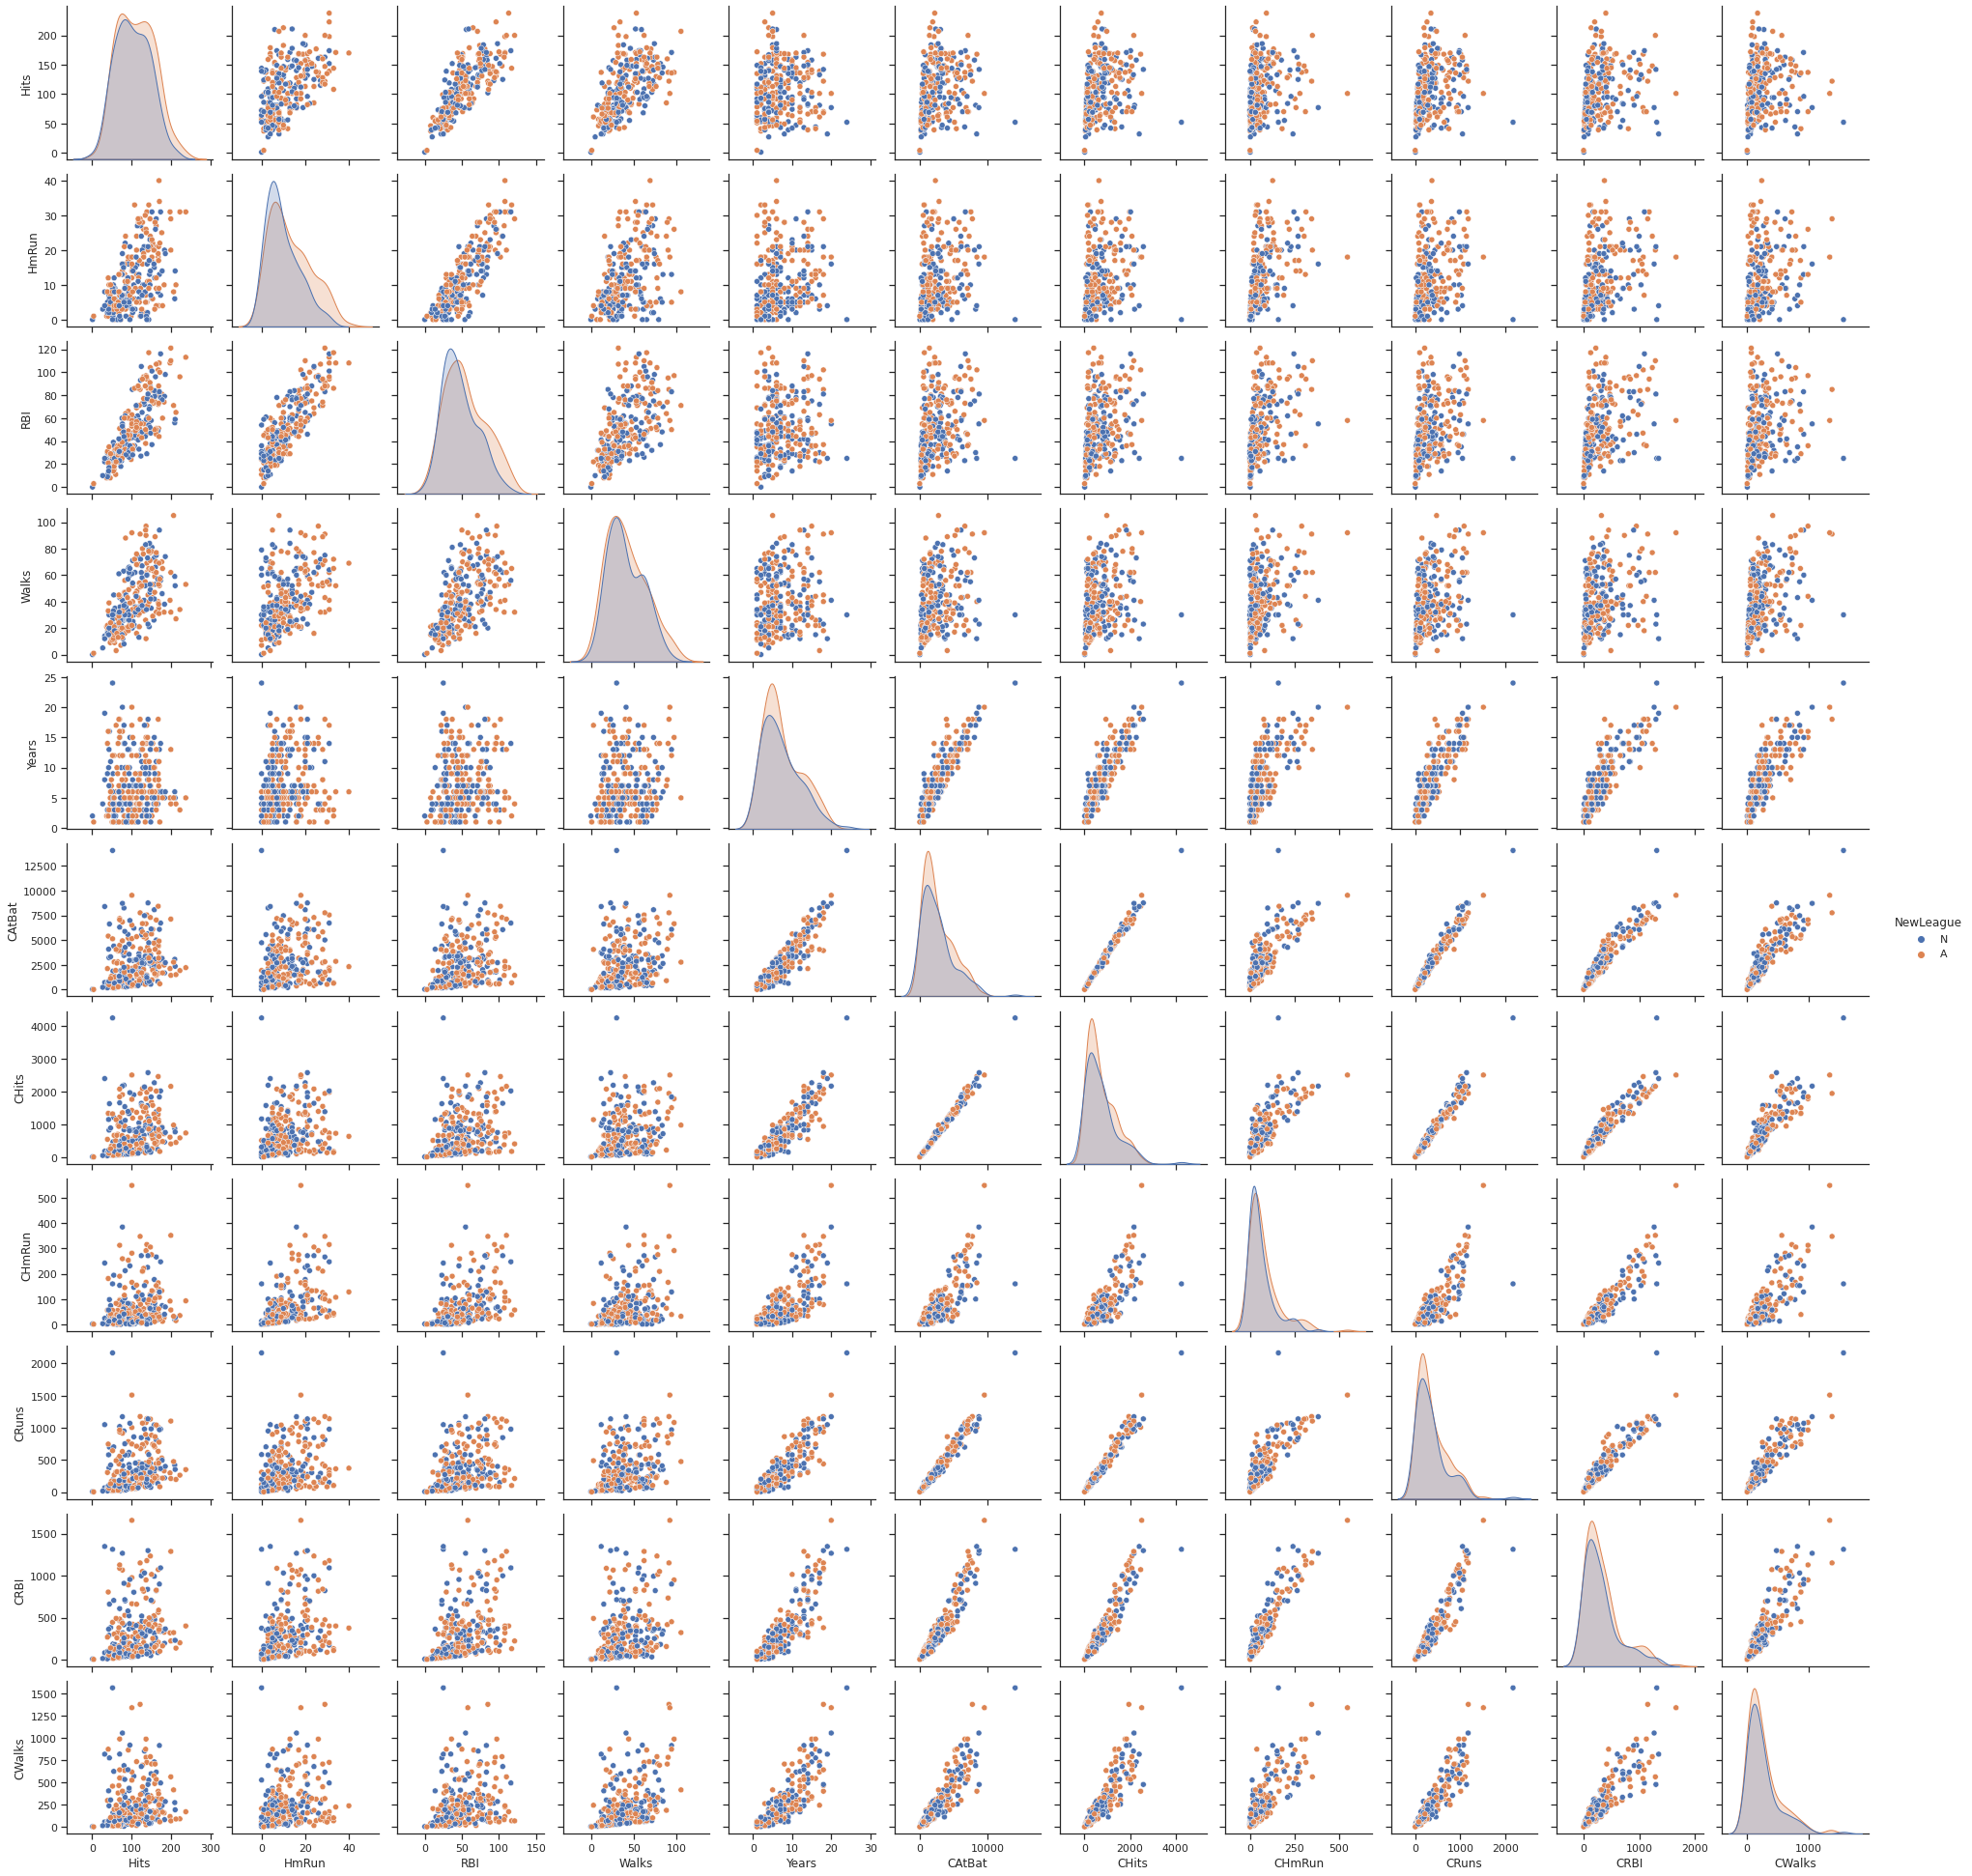

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="NewLeague")
plt.show()

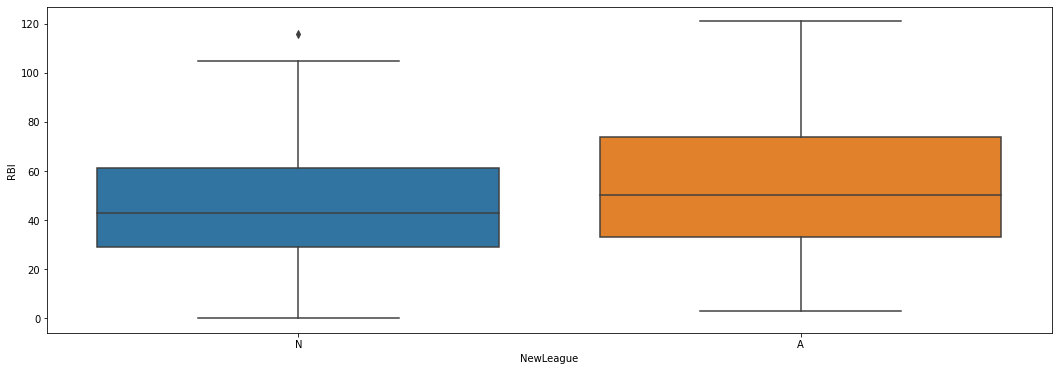

In [ ]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='NewLeague',
                y = 'RBI',
                data = df)

g.set_xlabel('NewLeague')
g.set_ylabel('RBI')
plt.show()

<Figure size 864x432 with 0 Axes>

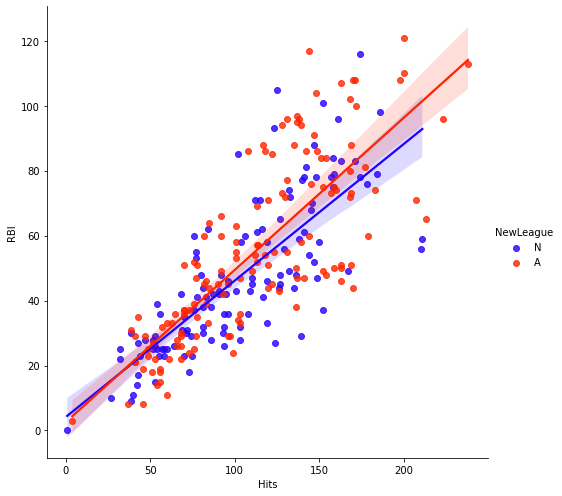

In [ ]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="Hits",
               y="RBI",
               hue="NewLeague",
               height=7,
               data=df,
               palette=['#2500ff','#ff2500'])
g.set_xlabels('Hits')
g.set_ylabels('RBI')

plt.show()

In [ ]:
numeric_features = ['Hits','HmRun','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks']

df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

In [ ]:
df = pd.get_dummies(df)
df.head()

,Hits,HmRun,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,NewLeague_A,NewLeague_N
-Alan Ashby,-0.594542,-0.527545,-0.521069,-0.097342,1.395233,0.346131,0.174042,-0.002914,-0.121439,0.258473,0.434506,0,1
-Alvin Davis,0.491323,0.728577,0.792549,1.606310,-0.899485,-0.452004,-0.409112,-0.075909,-0.414315,-0.199211,0.010353,1,0
-Andre Dawson,0.735088,0.956963,1.024364,-0.189431,0.769401,1.299081,1.315665,1.894952,1.409364,1.569674,0.354977,0,1
-Andres Galarraga,-0.461579,-0.184967,-0.366526,-0.511743,-1.108096,-0.989050,-0.958326,-0.696365,-0.945718,-0.879551,-0.860675,0,1
-Alfredo Griffin,1.355583,-0.870124,-0.018804,-0.281520,0.769401,0.765534,0.633776,-0.611205,0.422041,0.017261,-0.250955,1,0


In [ ]:
X = df.drop(['RBI'], axis=1)
y = df['RBI']


Cross-Validation (Ridge E Lasso)

In [ ]:
# metodo de avaliação do modelo
cv = skm.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# modelo de ridge 
model = skl.RidgeCV(alphas=np.arange(0, 1, 0.001), cv=cv, scoring='neg_mean_absolute_error')
# ajuste do modelo
model.fit(X, y)
print('alpha: %f' % model.alpha_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.00788e-18): result may not be accurate.
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.17659e-18): result may not be accurate.
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.97223e-18): result may not be accurate.
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.9533e-18): result may not be accurate.
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.05268e-18): result may not be accurate.
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.08777e-18): result may not be accurate.
  


alpha: 0.365000


In [ ]:
# metodo de avaliação do modelo
cv = skm.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# modelo de Lasso
model = skl.LassoCV(alphas=np.arange(0, 1, 0.001), cv=cv, n_jobs=-1)
# ajuste do modelo
model.fit(X, y)
print('alpha: %f' % model.alpha_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.33575800798181, tolerance: 0.022383113085694968
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

alpha: 0.003000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.991165594184707, tolerance: 0.024253117716147198
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  rather than looping over features sequentially by default. This
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Testes de Regressão Linear, Lasso e Ridge.

In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(X,df['RBI'], test_size=0.3, random_state=0)

In [ ]:
lr = skl.LinearRegression().fit(X_train, y_train)
lr_lasso = skl.Lasso(alpha=0.003).fit(X_train, y_train)
lr_ridge = skl.Ridge(alpha=0.365).fit(X_train, y_train)

In [ ]:
model_list = [lr, lr_lasso, lr_ridge]
models = ['Linear Regression', 'Lasso', 'Ridge']

coefs = []
for model in model_list:
    coefs.append(model.coef_)

coefs = pd.DataFrame(coefs, columns=X.columns, index=models)

coefs

,Hits,HmRun,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,NewLeague_A,NewLeague_N
Linear Regression,0.429006,0.556306,0.108066,0.107773,0.344660,-1.428737,-0.618260,0.302576,1.454020,-0.247810,-0.004295,0.004295
Lasso,0.416520,0.544151,0.100699,0.070346,-0.000000,-0.276876,-0.199302,-0.165593,0.689756,-0.132386,0.000000,-0.000000
Ridge,0.419913,0.551300,0.110843,0.108267,0.039134,-0.611874,-0.365439,-0.037279,0.997854,-0.174333,0.001382,-0.001382


In [ ]:
mse = []
rmse = []

for model in model_list:
    mse.append(np.mean((y_test - model.predict(X_test))**2))
    rmse.append(np.sqrt(mse[-1]))

tb = pd.DataFrame({ 'MSE': mse, 'RMSE': rmse}, index=models)

# highlight the minimum of each column
tb.style.background_gradient(cmap='RdYlGn')



,MSE,RMSE
Linear Regression,0.153774,0.392140
Lasso,0.132292,0.363720
Ridge,0.140005,0.374173
